In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


##### QUESTIONS TO SOLVE 


<li>create a sorted bar chart of relative type frequencies.
<li>create a bar chart of Pokemon species introduced by generation.
    <li>create a histogram of Pokemon special defense values.
<li>create a histogram of Pokemon heights.
<li>create a histogram of Pokemon weights.

We'll continue working with the Pokémon dataset in this workspace.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task**: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. **Hint**: Try playing around with different bin width sizes to see what best depicts the data.

##### barplot equal countplot in seaborn 

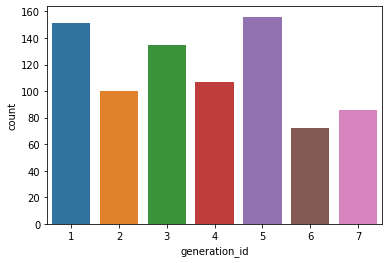

In [4]:
# YOUR CODE HERE
sb.countplot(data=pokemon, x='generation_id')

The above plot has different colors of bar plots but we don't need it, its adding no value since we already know that the bar plots are of different generation (category), therefore we would make the color uniform.

In [5]:
base_color=sb.color_palette()[0]

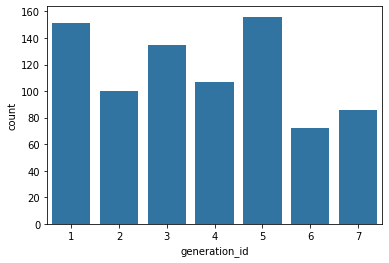

In [6]:
sb.countplot(data=pokemon, x='generation_id', color=base_color)

##### we can order the plot in ascending, descenging or using numbers as well, for adding readability to the graph

here we will sort values using manual sorting, then in the next graph we would sort it using the pandas functions<br>
For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

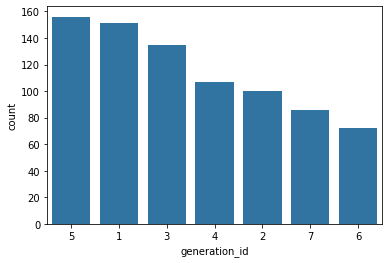

In [16]:
sb.countplot(data=pokemon, x='generation_id', color=base_color,
            order=[5,1,3,4,2,7,6])

In [17]:
generation_counts_sorted = pokemon['generation_id'].value_counts()

In [18]:
generation_counts_sorted

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

To get the index values, we would use .index prop

In [19]:
generation_counts_sorted_index = pokemon['generation_id'].value_counts().index

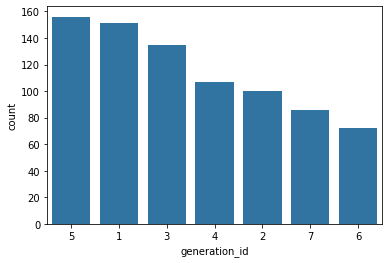

In [20]:
sb.countplot(data=pokemon, x='generation_id', color=base_color,
            order=generation_counts_sorted_index)

#### plot types of pokemon based on weakness  and strengths 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

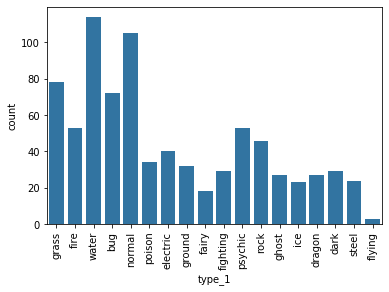

In [23]:
sb.countplot(data=pokemon, x='type_1', color=base_color)
plt.xticks(rotation = 90)

<b>xticks</b> function of matplotlib rotates the label by degrees 

In [24]:
type_1_order_index=pokemon['type_1'].value_counts().index

Above we were plotting on x axis (univariate) according to types (characteristics), we can plot the same things on y axis, just by changing the x to y in countplot

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

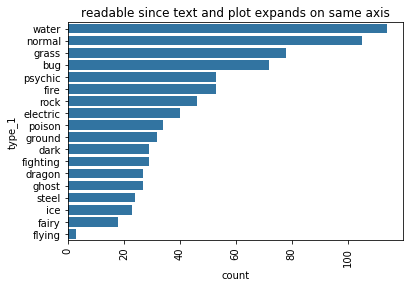

In [27]:
sb.countplot(data=pokemon, y='type_1', color=base_color,
            order=type_1_order_index)
plt.title('readable since text and plot expands on same axis')
plt.xticks(rotation = 90)

ADDITIONAL INFO: If your data is in a pandas Series, 1-d NumPy array, or list, you can also just set it as the first argument to the countplot function, as we do with the Series data_var here:

sb.countplot(data_var)

## RELATIVE FREQUENCY
To find out what portion of data falls under which category

In [37]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                         value_vars = ['type_1' , 'type_2'],
                         var_name = 'type_level',
                         value_name='type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


Above we have unpivoted using type_1 and type_2<br>
we are taking id and species as identifiers and unpivoting type_1 and type_2<br>
now both type_1 and type_2 has come onto single column

In [40]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

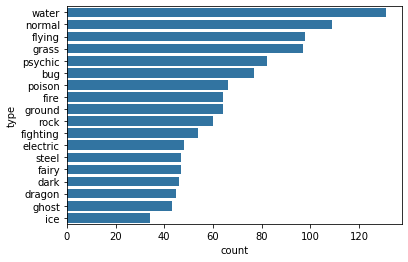

In [41]:
base_color=sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color,
            order=type_order)

we have plotted only absolute value

##### now changing into relative frequency , matplot uses tick to change absolute counts 

now we will try to get the maximin probabilities for our plot

In [42]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [46]:
tick_props=np.arange(0,max_prop,0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

now we will use tick names to show the value in front of each bar

In [47]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

Now plotting again with tick values and names

Text(0.5, 0, 'proportion')

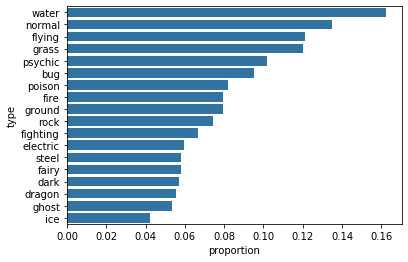

In [48]:
base_color=sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color,
            order=type_order);
plt.xticks(tick_props*n_pokemon, tick_names)
plt.xlabel('proportion')

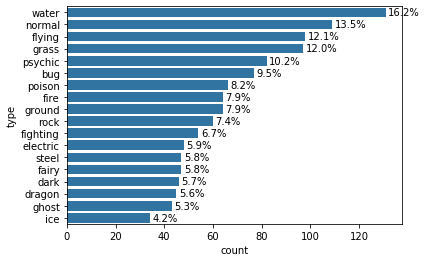

In [49]:
base_color=sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color,
            order=type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')

## COUNT MISSING DATA 

(14,)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

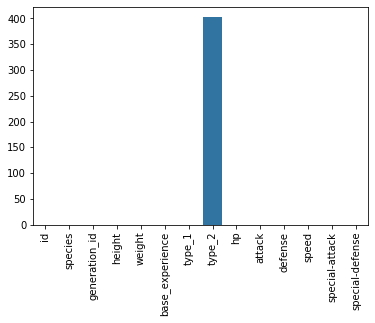

In [57]:
pkmn_na_counts=pokemon.isna().sum()
print(pkmn_na_counts.shape)
base_color = sb.color_palette()[0]
sb.barplot(pkmn_na_counts.index.values, pkmn_na_counts, color=base_color)
plt.xticks(rotation=90)

<b>NOTE:</b> if data is summarized use countplot, if not then use barplot

## HISTOGRAM 

#### We BAG the values in  histogram. Almost same as barplot or countplot

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

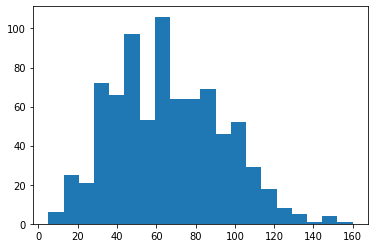

In [59]:
#hist2D for 2D data
plt.hist(data=pokemon, x='speed')

usually matplot distribute bins into 10 bins<br>
use bins parameter for bin numbers

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

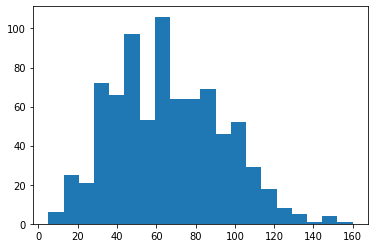

In [60]:
#hist2D for 2D data
plt.hist(data=pokemon, x='speed', bins=20)

best way is to give the bins values yourself

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

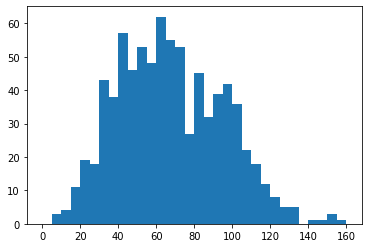

In [63]:
bin_size=5
bins = np.arange(0, pokemon['speed'].max()+5, bin_size)
plt.hist(data=pokemon, x='speed', bins=bins)

(array([ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         1.,  0., 11.,  0.,  0.,  0.,  0., 13.,  0.,  1.,  4.,  1., 10.,
         0.,  1.,  4.,  3., 33.,  2.,  5.,  2.,  1., 26.,  6.,  2.,  3.,
         1., 36.,  2.,  8.,  8.,  3., 34.,  3.,  2.,  6.,  1., 45.,  3.,
         5.,  0.,  0., 29.,  4.,  4.,  8.,  3., 49.,  3.,  2.,  3.,  5.,
        40.,  4.,  4.,  6.,  1., 37.,  5.,  5.,  3.,  3., 15.,  3.,  3.,
         3.,  3., 33.,  3.,  1.,  4.,  4., 29.,  0.,  1.,  1.,  1., 29.,
         4.,  3.,  3.,  0., 27.,  2.,  7.,  3.,  3., 24.,  6.,  2.,  2.,
         2., 10.,  2.,  1.,  6.,  3., 11.,  2.,  3.,  1.,  1.,  8.,  2.,
         1.,  1.,  0.,  4.,  1.,  1.,  1.,  1.,  4.,  1.,  0.,  0.,  0.,
         5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
 

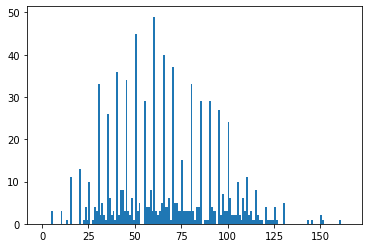

In [65]:
bin_size=1
bins = np.arange(0, pokemon['speed'].max()+5, bin_size)
plt.hist(data=pokemon, x='speed', bins=bins)

above plot has too much noise due to small bin size, perhaps larger bin suited well 

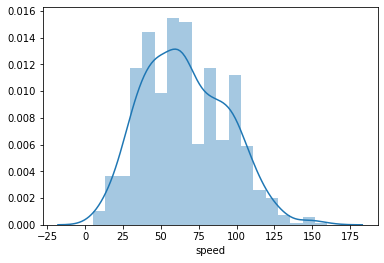

In [64]:
sb.distplot(pokemon['speed'])

does the same but default bin size is larger and a line drawn, y is small values since its the distribution<br>
kde=false, turns off the density curve

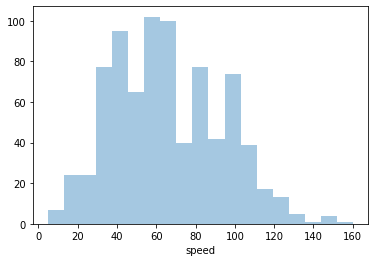

In [66]:
sb.distplot(pokemon['speed'], kde=False)

<li>create a histogram of Pokemon special defense values.
<li>create a histogram of Pokemon heights.
<li>create a histogram of Pokemon weights.

##### create a histogram of Pokemon special defense values. 

In [67]:
pokemon.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special-attack', 'special-defense'],
      dtype='object')

(array([ 0.,  0.,  0.,  0.,  6., 12., 29., 28., 49., 53., 66., 59., 63.,
        53., 57., 51., 52., 42., 37., 34., 29., 18., 14., 11., 10.,  4.,
        12.,  4.,  3.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230]),
 <a list of 1 Patch objects>)

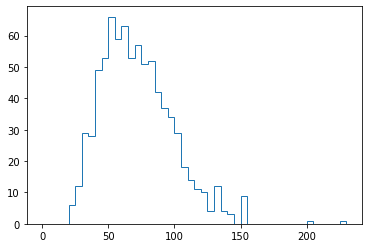

In [77]:
defence_bins=np.arange(0,pokemon['special-defense'].max()+5, 5)
plt.hist(pokemon['special-defense'], bins=defence_bins, histtype='step')

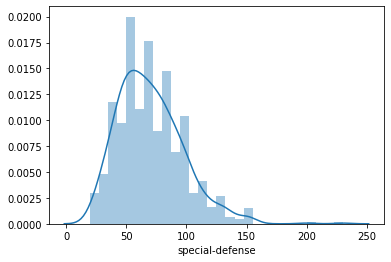

In [78]:
sb.distplot(pokemon['special-defense'])

##### create a histogram of Pokemon heights.  

(array([641., 134.,  17.,   8.,   3.,   0.,   3.,   0.,   0.,   1.]),
 array([ 0.1 ,  1.54,  2.98,  4.42,  5.86,  7.3 ,  8.74, 10.18, 11.62,
        13.06, 14.5 ]),
 <a list of 10 Patch objects>)

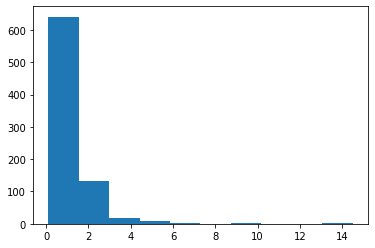

In [87]:
plt.hist(pokemon['height'])

We need to reduce the size of the bins

(array([391., 332.,  52.,  14.,   5.,   6.,   2.,   1.,   1.,   2.,   0.,
          0.,   0.,   0.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <a list of 15 Patch objects>)

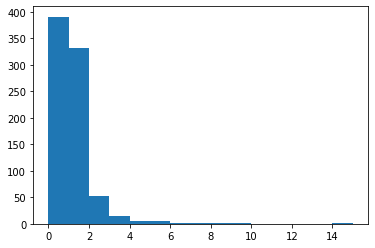

In [91]:
bin_size=1
pokemon_height_bins=np.arange(0, pokemon['height'].max()+bin_size,bin_size)
plt.hist(pokemon['height'], bins=pokemon_height_bins)

bin size=1 is also not giving us good information

(array([  5.,  72., 196.,  40.,  78., 148.,  58.,  44.,  47.,  35.,  30.,
         12.,   5.,   4.,   1.,   3.,   4.,   2.,   4.,   1.,   2.,   1.,
          2.,   0.,   0.,   1.,   1.,   3.,   1.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
        11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
        13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6]),
 <

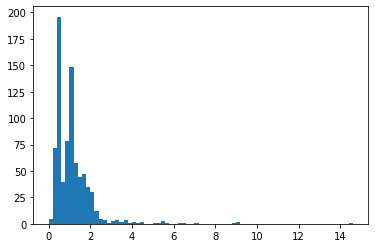

In [89]:
bin_size=0.2
pokemon_height_bins=np.arange(0, pokemon['height'].max()+bin_size,bin_size)
plt.hist(pokemon['height'], bins=pokemon_height_bins)

we can see that the pokemon height is concentrated near the same value

(0, 6)

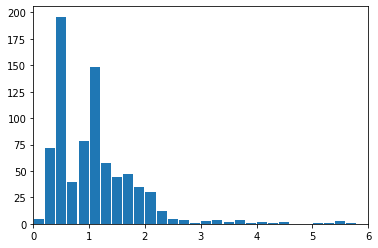

In [100]:
bin_size=0.2
pokemon_height_bins=np.arange(0, pokemon['height'].max()+bin_size,bin_size)
plt.hist(pokemon['height'], bins=pokemon_height_bins, rwidth=0.9)
plt.xlim((0,6))

We used plt.xlim to concentrate the plot from x=0-6 , this is how we removed the OUTLIER

rwidth param here means, take 0.9 for the plot and leave 0.1 as an empty space 

##### create a histogram of Pokemon weights. 

(array([683.,  65.,  32.,  14.,   3.,   2.,   1.,   1.,   2.,   4.]),
 array([1.0000e-01, 1.0008e+02, 2.0006e+02, 3.0004e+02, 4.0002e+02,
        5.0000e+02, 5.9998e+02, 6.9996e+02, 7.9994e+02, 8.9992e+02,
        9.9990e+02]),
 <a list of 10 Patch objects>)

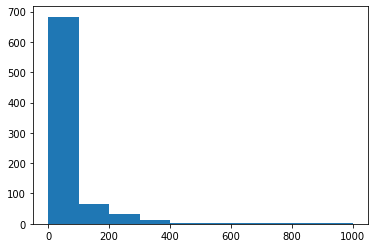

In [92]:
plt.hist(pokemon.weight)

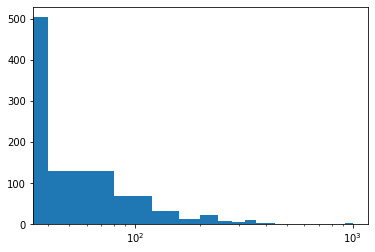

In [102]:
bin_val=40
weight_bins=np.arange(0,pokemon.weight.max()+bin_val, bin_val)
plt.hist(pokemon.weight, bins=weight_bins)

we can see that the weight is changing exponentiall therefore we will transofrm the axis to log, to get a better plot 

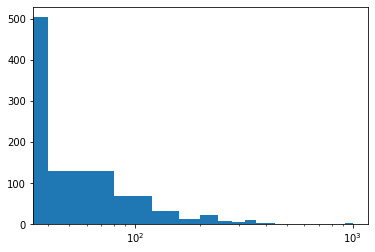

In [103]:
bin_val=40
weight_bins=np.arange(0,pokemon.weight.max()+bin_val, bin_val)
plt.hist(pokemon.weight, bins=weight_bins)
plt.xscale('log')

discuss wight

In [104]:
pokemon.weight.describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

we willo modify bin boundaries further, with log10

In [105]:
np.log10(pokemon.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

our bin edges will be 10 power

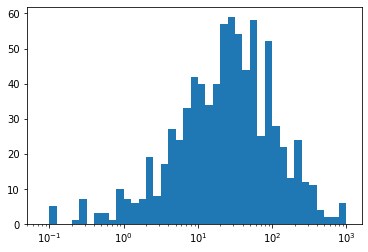

In [106]:
bin_val=0.1
weight_bins=10 ** np.arange(-1.1,3+bin_val, bin_val)
plt.hist(pokemon.weight, bins=weight_bins)
plt.xscale('log')

add tick labels for making it more readable

([<matplotlib.axis.XTick at 0x7fe22d708290>,
 <a list of 9 Text xticklabel objects>)

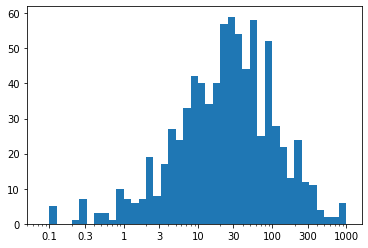

In [108]:
bin_val=0.1
weight_bins=10 ** np.arange(-1.1,3+bin_val, bin_val)
ticks = [0.1,0.3,1,3,10,30,100,300,1000]
labels=['{}'.format(v) for v in ticks]
plt.hist(pokemon.weight, bins=weight_bins)
plt.xscale('log')
plt.xticks(ticks, labels)

<b>CAUTION: </b> For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value.